In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Die biases können wir auf verschiedene Arten vergleichen:
- Pro Model
    - Linear regression: Standardized Coefficient
    - Gaussian process: Relevance score
- Zwischen Models
    - Using the Rank
    
=> Da wir nicht alle Kovariaten kennen ist der Rank möglicherweise nicht passend. Wir sollten jedoch die Versionen und Branchen in einem Plot mittels Relevanz-Maß darstellen. So können auch Inkonsistenzen zwischen den Modellen sichtbar gemacht werden.

=> Frage: Was ist wichtiger - ein Relevanz-Betrag der die Stärke eines Einflusses andeutet oder ein Rang relativ zu den anderen Kovariaten der sich über die Versionen usw. verändern kann?

In [5]:
# Plot des Relevanz-Maßes
def plot_magnitude(x, versions, feats, weights, ranks, dim, 
                   hpos=0, ylim=[-1,1], e=None, colors=["blue", "orange"]):
    fig, ax = plt.subplots(figsize=(15,8))
    
    #plt.vlines(x=x, ymax=ylim[1]+1, ymin=ylim[0]-1, color='gray', linestyle='solid', linewidth=2)
    #plt.hlines(y=hpos, xmax=0, xmin=4, color='gray', linestyle='dotted', linewidth=2)


    for idx, feat in enumerate(feats):
        if e == None:
            ax.scatter(x, weights[idx], label=feats[idx], c=colors[idx])
            ax.axhline(1, c="grey", linestyle="--")
        else:
            ax.errorbar(x, weights[idx], yerr=1.96*np.array(e[idx]), fmt='o', label=feats[idx], c=colors[idx])
            ax.axhline(0, c="grey", linestyle="--")

        for i, txt in enumerate(ranks[idx]):
            ax.annotate(txt, (x[i]+.02, weights[idx][i]), size=12)

        ax.plot(x, weights[idx])

    #for line, name in zip(ax.lines, feats):
    #    y = line.get_ydata()[-1]
    #    ax.annotate(name, xy=(1,y), xytext=(6,0), color=line.get_color(), 
    #                xycoords = ax.get_yaxis_transform(), textcoords="offset points",
    #                size=14, va="center")

    plt.xticks(x, versions)
    plt.title("Social feature: %s"%dim)
    plt.ylim(ylim)
    plt.xlim([0.8, 3.2])
    plt.legend()
    plt.show()
    plt.close()

In [6]:
# Plot des Ranks
def plot_rank(x, versions, feats, ranks, dim, ylim=[-1,1]):
    fig, ax = plt.subplots(figsize=(15,8))

    for idx, feat in enumerate(feats):
        ax.scatter(x, ranks[idx], label=feats[idx])
        ax.plot(x, ranks[idx])

    #for line, name in zip(ax.lines, feats):
    #    y = line.get_ydata()[-1]
    #    ax.annotate(name, xy=(1,y), xytext=(6,0), color=line.get_color(), 
    #                xycoords = ax.get_yaxis_transform(), textcoords="offset points",
    #                size=14, va="center")

    plt.vlines(x=x, ymax=ylim[1]+1, ymin=ylim[0]-1, color='gray', linestyle='solid', linewidth=2)
    plt.xticks(x, versions)
    plt.title("Social feature: %s"%dim)
    plt.ylim(ylim)
    ax.invert_yaxis()
    plt.legend()
    plt.show()
    plt.close()

# Linear regression

## Sex

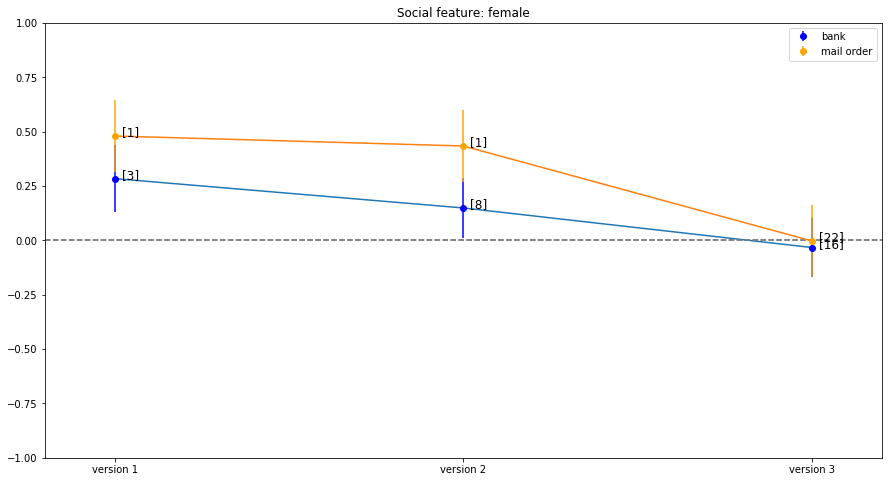

In [7]:
dim = "female"
x = [1, 2, 3]
versions = ["version 1", "version 2", "version 3"]

sector = ["bank", "mail order"]
weights = [[0.284, 0.149, -0.033],
           [0.48, 0.434, -0.003]]
ranks = [["[3]", "[8]", "[16]"],
         ["[1]", "[1]", "[22]"]]
error = [[0.079, 0.071, 0.069],
         [0.085, 0.084, 0.085]]

plot_magnitude(x, versions, sector, weights, ranks, dim, e=error)

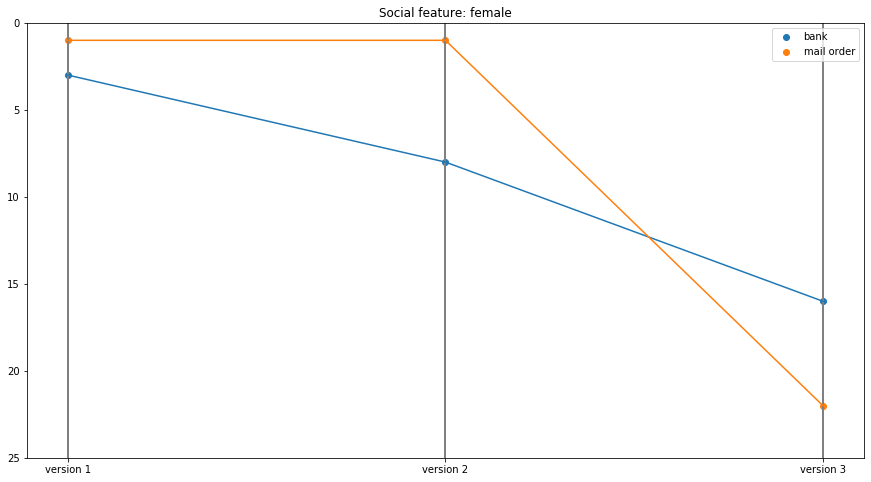

In [8]:
dim = "female"
x = [1, 2, 3]
versions = ["version 1", "version 2", "version 3"]

sector = ["bank", "mail order"]
ranks = [[3, 8, 16],
         [1, 1, 22]]

plot_rank(x, versions, sector, ranks, dim, ylim=[0,25])

## Age

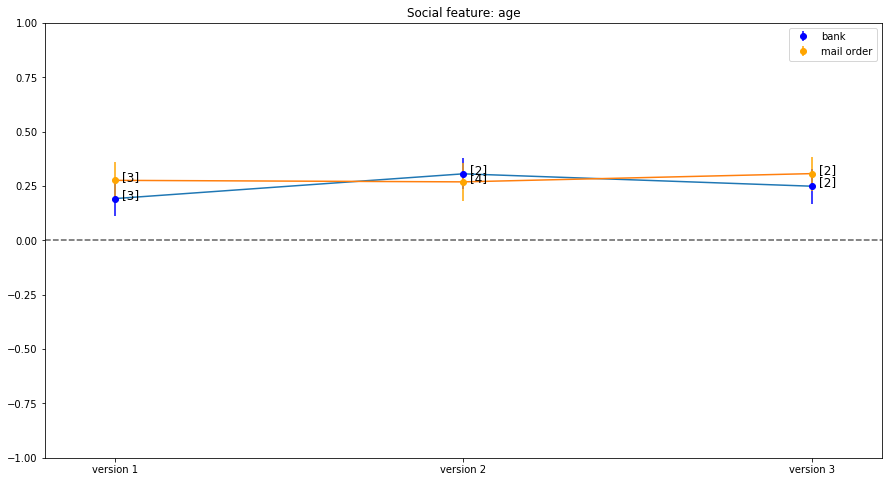

In [9]:
dim = "age"
x = [1, 2, 3]
versions = ["version 1", "version 2", "version 3"]

sector = ["bank", "mail order"]
weights = [[0.192, 0.306, 0.249],
           [0.276, 0.269, 0.307]]
ranks = [["[3]", "[2]", "[2]"],
         ["[3]", "[4]", "[2]"]]

error = [[0.041, 0.036, 0.041],
         [0.043, 0.044, 0.04]]

plot_magnitude(x, versions, sector, weights, ranks, dim, e=error)

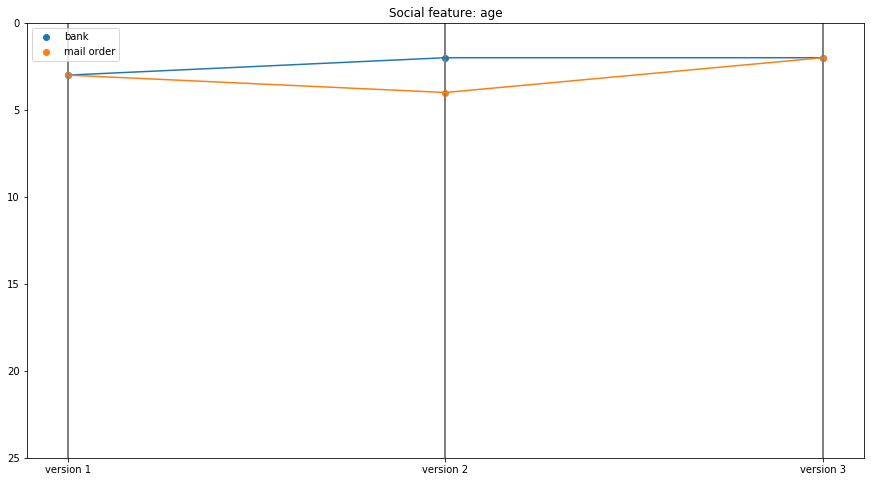

In [10]:
dim = "age"
x = [1, 2, 3]
versions = ["version 1", "version 2", "version 3"]

sector = ["bank", "mail order"]
ranks = [[3, 2, 2],
         [3, 4, 2]]

plot_rank(x, versions, sector, ranks, dim, ylim=[0,25])

## East/West

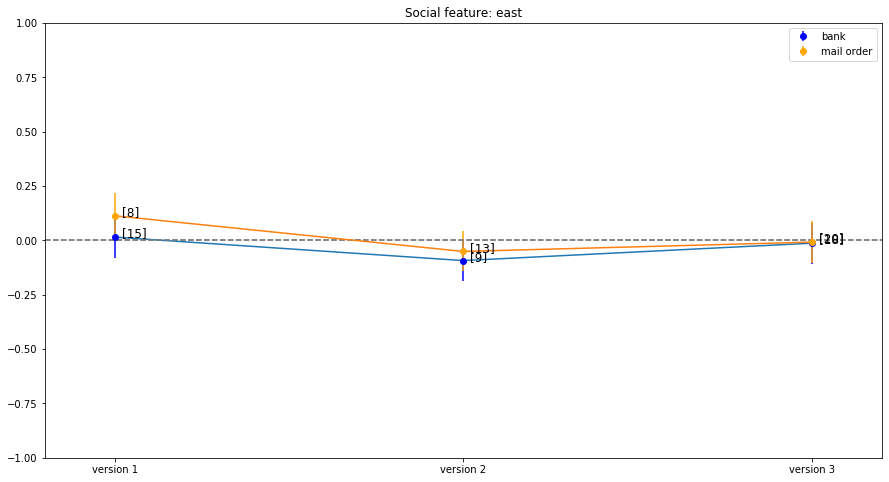

In [11]:
dim = "east"
x = [1, 2, 3]
versions = ["version 1", "version 2", "version 3"]

sector = ["bank", "mail order"]
weights = [[0.015, -0.093, -0.013],
           [0.113, -0.051, -0.008]]
ranks = [["[15]", "[9]", "[18]"],
         ["[8]", "[13]", "[20]"]]
error = [[0.05, 0.047, 0.048],
         [0.053, 0.047, 0.05]]

plot_magnitude(x, versions, sector, weights, ranks, dim, e=error)

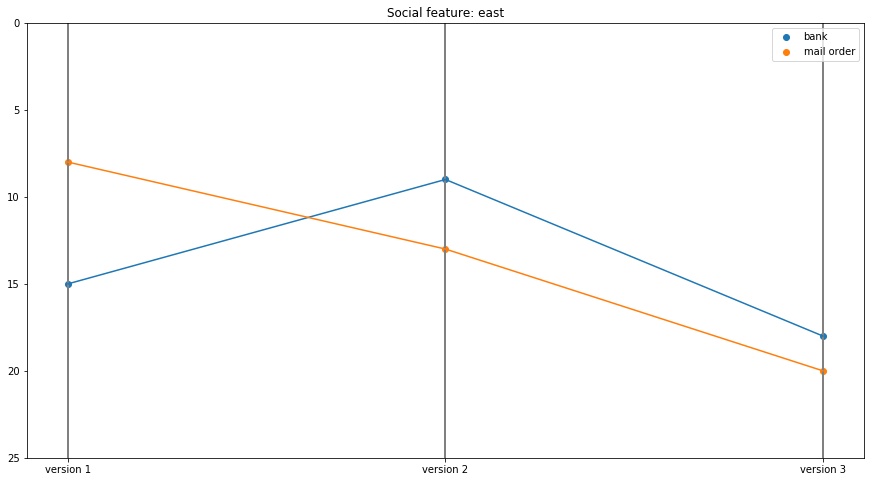

In [12]:
dim = "east"
x = [1, 2, 3]
versions = ["version 1", "version 2", "version 3"]

sector = ["bank", "mail order"]
ranks = [[15, 9, 18],
         [8, 13, 20]]

plot_rank(x, versions, sector, ranks, dim, ylim=[0,25])

# Gaussian process

## female

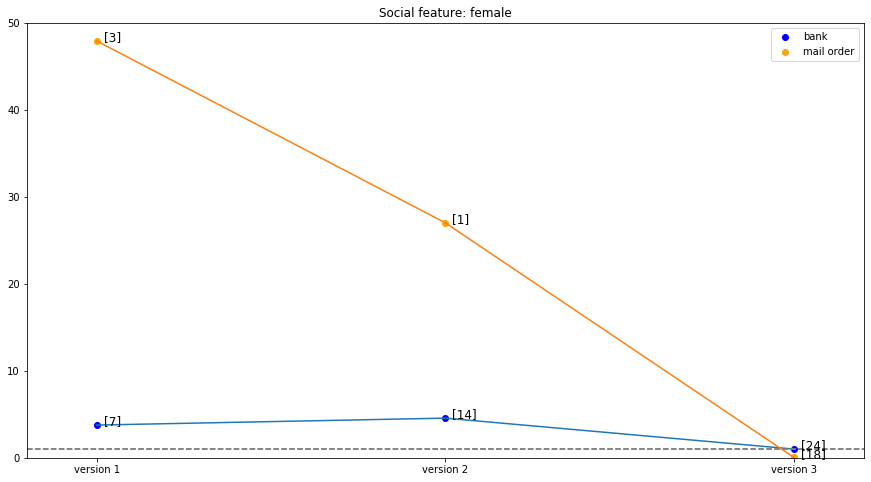

In [13]:
dim = "female"
x = [1, 2, 3]
versions = ["version 1", "version 2", "version 3"]

sector = ["bank", "mail order"]
weights = [[3.763, 4.561, 1.0],
           [47.933, 27.015, 0.035]]
ranks = [["[7]", "[14]", "[24]"],
         ["[3]", "[1]", "[18]"]]

plot_magnitude(x, versions, sector, weights, ranks, dim, hpos=1, ylim=[0,50])

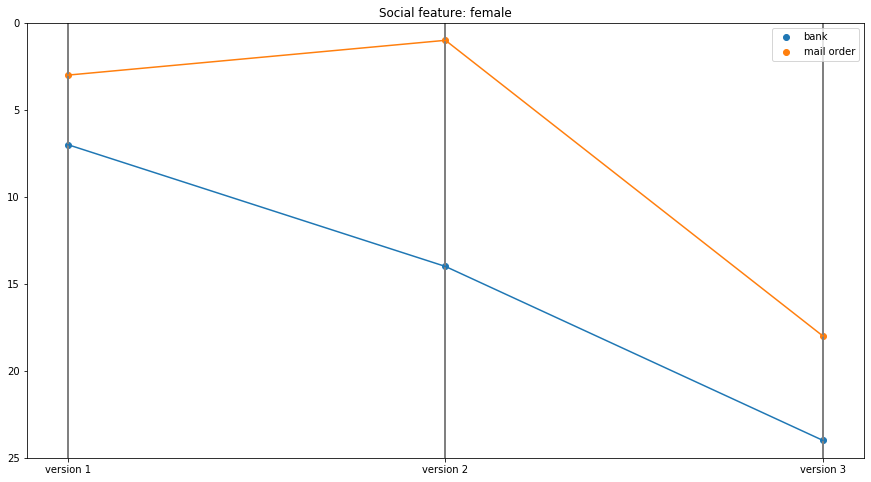

In [14]:
dim = "female"
x = [1, 2, 3]
versions = ["version 1", "version 2", "version 3"]

sector = ["bank", "mail order"]
ranks = [[7, 14, 24],
         [3, 1, 18]]

plot_rank(x, versions, sector, ranks, dim, ylim=[0,25])

## age

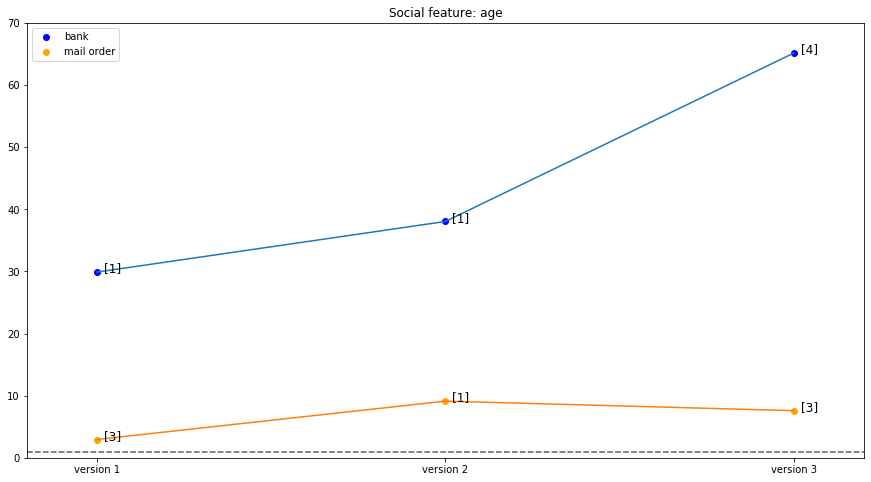

In [15]:
dim = "age"
x = [1, 2, 3]
versions = ["version 1", "version 2", "version 3"]

sector = ["bank", "mail order"]
weights = [[29.882, 38.039, 65.169],
           [2.941, 9.12, 7.586]]
ranks = [["[1]", "[1]", "[4]"],
         ["[3]", "[1]", "[3]"]]

plot_magnitude(x, versions, sector, weights, ranks, dim, hpos=1, ylim=[0,70])

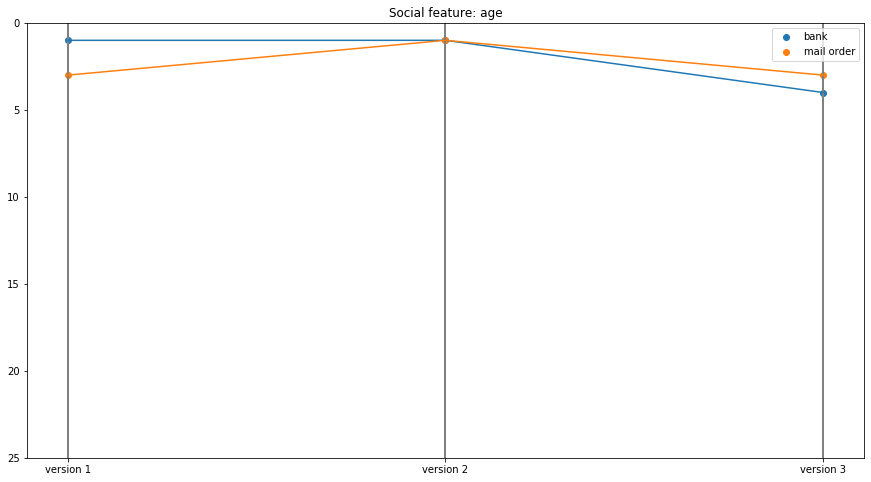

In [16]:
dim = "age"
x = [1, 2, 3]
versions = ["version 1", "version 2", "version 3"]

sector = ["bank", "mail order"]
ranks = [[1, 1, 4],
         [3, 1, 3]]

plot_rank(x, versions, sector, ranks, dim, ylim=[0,25])

## east

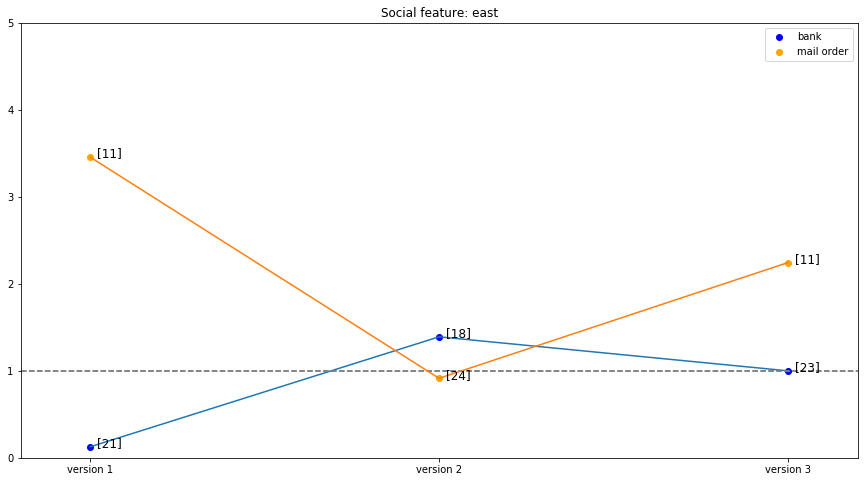

In [17]:
dim = "east"
x = [1, 2, 3]
versions = ["version 1", "version 2", "version 3"]

sector = ["bank", "mail order"]
weights = [[0.127, 1.391, 1],
           [3.456, 0.914, 2.244]]
ranks = [["[21]", "[18]", "[23]"],
         ["[11]", "[24]", "[11]"]]

plot_magnitude(x, versions, sector, weights, ranks, dim, hpos=1, ylim=[0,5])

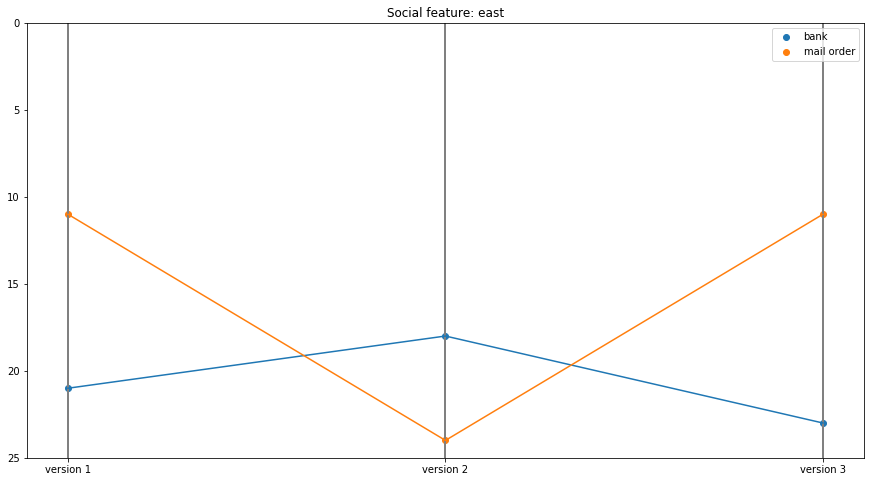

In [18]:
dim = "east"
x = [1, 2, 3]
versions = ["version 1", "version 2", "version 3"]

sector = ["bank", "mail order"]
ranks = [[21, 18, 23],
         [11, 24, 11]]

plot_rank(x, versions, sector, ranks, dim, ylim=[0,25])

## Compute all u-values

In [15]:
from scipy import stats

def do_utests(df, treat, covariates, attr):
    
    cases = []
    
    for i in covariates:
        if i=="id" or i=="east_west" or i=="sex" or i=="bin_age":
            continue
                    
        t = df[df[treat]==attr[0]][i]
        t = t.dropna()

        c = df[df[treat]==attr[1]][i]
        c = c.dropna()
        
        # Use mann-whitney-u test
        stat, pval = stats.mannwhitneyu(t, c, alternative='two-sided')
        
        cases.append([treat, i, stat, pval])
            
    return pd.DataFrame(cases, columns=["social feature", "covariate", "u-statistic", "p-value"]).sort_values("p-value", ascending=False)

In [5]:
def prepare_type(df_data):
    # Nominal features
    df_data["sex"] = df_data["sex"].astype("category")
    df_data["familyStatus"] = df_data["familyStatus"].astype("category")
    df_data["employment"] = df_data["employment"].astype("category")
    df_data["housing"] = df_data["housing"].astype("category")
    df_data["east_west"] = df_data["east_west"].astype("category")

    # Ordinal features
    cat_ordtype = pd.api.types.CategoricalDtype(categories=[500, 1000, 2000, 3000, 4000, 5000], ordered=True)

    df_data["monthlyIncome"] = df_data["monthlyIncome"].astype(cat_ordtype)
    df_data["activeLoanAmount"] = df_data["activeLoanAmount"].astype(cat_ordtype)
    df_data["paidOffLoanAmount"] = df_data["paidOffLoanAmount"].astype(cat_ordtype)
    
    return df_data

In [10]:
def get_feature_lists(domain):
    # Separate Columns into data types as well as predictors and target

    nominal = ["sex", "east_west", "mailOrder"]
    nom_idx = len(nominal)

    metric = ['monthlyIncome', 'age', 'relocation', # questionnaire data
              'request', 'banking_connection', 'business_relation', 'conditions',
              'credit_card', 'giro', 'global_credit', 'identity', 'secured_loan',
              'solvency', 'telecom', 'unsecured_loan', # feature counts
              domain+'_req', 'finance_year', # request/time counts
              'credit_days', 'credit_card_days', 'giro_days'] # time-based

    target = ["score"]



    # Separate Columns into counts (discrete with zero-inflation) and non-counts

    counts = ['relocation', 
              'request', 'banking_connection', 'business_relation', 'conditions',
              'credit_card', 'giro', 'global_credit', 'identity', 'secured_loan',
              'solvency', 'telecom', 'unsecured_loan',
              domain+'_req', 'finance_year']

    non_counts = ["female", "east", "mailOrder",
                  'monthlyIncome', 'age', 
                  'credit_days', 'credit_card_days', 'giro_days']
    
    return nominal, nom_idx, metric, target, counts, non_counts

In [6]:
data_path = "/media/veracrypt1/SPON_dataset_tables/"

In [45]:
for feat in [["sex", ["female", "male"]], ["east_west", ["east", "west"]], ["age", ["<40", ">=40"]]]:
    for domain in ["Banken", "Versandhandel"]:
        for version in [1, 2, 3]:
            print(feat)
            ds = pd.read_csv(data_path + "datasets_v2/20190704__analysis_dataset_matching_%s.csv"%feat[0], sep=";")
            ds = prepare_type(ds)
                   
            df_data = ds[(ds["domain"]==domain) & (ds["version"]==version)]
            nominal, nom_idx, metric, target, counts, non_counts = get_feature_lists(domain)
            relevant_feats = target + nominal + metric

            if feat[0] == "age":
                feat = ["bin_age", ["<40", ">=40"]]
                Xy = df_data[["id"]+relevant_feats + [feat[0]]]
            else:
                Xy = df_data[["id"]+relevant_feats]

            Xy = Xy.dropna()
            Xy.monthlyIncome = Xy.monthlyIncome.cat.codes

            df_u = do_utests(Xy, feat[0], target+metric, feat[1])
            
            if feat[0] == "bin_age":
                feat = ["age", ["<40", ">=40"]]

            df_u.to_csv("measures/u_values_subsamples/%s_%s_%d.csv"%(feat[0], domain, version), index=True, sep=";")

['sex', ['female', 'male']]
['sex', ['female', 'male']]
['sex', ['female', 'male']]
['sex', ['female', 'male']]
['sex', ['female', 'male']]
['sex', ['female', 'male']]
['east_west', ['east', 'west']]
['east_west', ['east', 'west']]
['east_west', ['east', 'west']]
['east_west', ['east', 'west']]
['east_west', ['east', 'west']]
['east_west', ['east', 'west']]
['age', ['<40', '>=40']]
['age', ['<40', '>=40']]
['age', ['<40', '>=40']]
['age', ['<40', '>=40']]
['age', ['<40', '>=40']]
['age', ['<40', '>=40']]


In [49]:
def binarize_age(row):
    if row < 40:
        return "<40"
    else:
        return ">=40"

ds = pd.read_csv(data_path + "datasets_v2/20190703_analysis_dataset_versandbank_final_cleaned.csv", sep=";")
ds = prepare_type(ds)

ds.insert(15, "bin_age", ds.age.apply(binarize_age))
ds["bin_age"] = ds["bin_age"].astype("category")

for feat in [["sex", ["female", "male"]], ["east_west", ["east", "west"]], ["bin_age", ["<40", ">=40"]]]:
    for domain in ["Banken", "Versandhandel"]:
        for version in [1, 2, 3]:
            print(feat)

            df_data = ds[(ds["domain"]==domain) & (ds["version"]==version)]
            nominal, nom_idx, metric, target, counts, non_counts = get_feature_lists(domain)
            relevant_feats = target + nominal + metric
            
            if feat[0] == "bin_age":
                Xy = df_data[["id"]+relevant_feats + [feat[0]]]
            else:
                Xy = df_data[["id"]+relevant_feats]
            
            Xy = Xy.dropna()
            Xy.monthlyIncome = Xy.monthlyIncome.cat.codes

            df_u = do_utests(Xy, feat[0], target+metric, feat[1])
            
            df_u.to_csv("measures/u_values_original/%s_%s_%d.csv"%(feat[0], domain, version), index=True, sep=";")

['sex', ['female', 'male']]
['sex', ['female', 'male']]
['sex', ['female', 'male']]
['sex', ['female', 'male']]
['sex', ['female', 'male']]
['sex', ['female', 'male']]
['east_west', ['east', 'west']]
['east_west', ['east', 'west']]
['east_west', ['east', 'west']]
['east_west', ['east', 'west']]
['east_west', ['east', 'west']]
['east_west', ['east', 'west']]
['bin_age', ['<40', '>=40']]
['bin_age', ['<40', '>=40']]
['bin_age', ['<40', '>=40']]
['bin_age', ['<40', '>=40']]
['bin_age', ['<40', '>=40']]
['bin_age', ['<40', '>=40']]


## get relevant model information

In [212]:
def print_lr_result(f, sector, v):
    name = f + "_" + sector + "_" + str(v)
    print(name)
    
    coeffs = pd.read_csv("linear_regression/model_coefficients_%s_all.csv"%name, sep=",|;").round(3)
    feat = coeffs[coeffs.predictor==f][["coefficient", "pvalue", "standard error"]].values.tolist()
    income = coeffs[coeffs.predictor=="monthlyIncome"][["coefficient", "pvalue"]].values.tolist()
    quality = pd.read_csv("linear_regression/model_quality_%s_all.csv"%name, sep=",|;").round(3)
    qual = quality[["f_p", "rmse", "rsq"]].values.tolist()
    coef_res = qual + income + feat + [[coeffs[coeffs.predictor==f].index[0]+1]]
    flat_list_all = [item for sublist in coef_res for item in sublist]

    coeffs = pd.read_csv("linear_regression/model_coefficients_%s_covariates.csv"%name, sep=",|;").round(3)
    feat = ["/", "/", "/"] #coeffs[coeffs.predictor=="age_log2"][["coefficient", "pvalue", "standard error"]].values.tolist()
    income = coeffs[coeffs.predictor=="monthlyIncome"][["coefficient", "pvalue"]].values.tolist()
    quality = pd.read_csv("linear_regression/model_quality_%s_covariates.csv"%name, sep=",|;").round(3)
    qual = quality[["f_p", "rmse", "rsq"]].values.tolist()
    coef_res = qual + income + feat + [["/"]]
    flat_list_cov = [item for sublist in coef_res for item in sublist]

    coeffs = pd.read_csv("linear_regression/model_coefficients_%s_predictor.csv"%name, sep=",|;").round(3)
    feat = coeffs[coeffs.predictor==f][["coefficient", "pvalue", "standard error"]].values.tolist()
    income = ["/", "/"] #coeffs[coeffs.predictor=="monthlyIncome"][["coefficient", "pvalue"]].values.tolist()
    quality = pd.read_csv("linear_regression/model_quality_%s_predictor.csv"%name, sep=",|;").round(3)
    qual = quality[["f_p", "rmse", "rsq"]].values.tolist()
    coef_res = qual + income + feat + [["/"]]
    flat_list_one = [item for sublist in coef_res for item in sublist]

    return pd.DataFrame([flat_list_all, flat_list_cov, flat_list_one], columns=["f_p", "rmse", "rsq", "coeff_income", "pval_income", "coeff_feat", "pval_feat", "se", "rank"])

In [213]:
for f in ["age_log2", "female", "east"]:
    for sector in ["Versandhandel", "Banken"]:
        for v in [1, 2, 3]:
            fu = f
            if f == "age_log2" and sector == "Banken" and v == 1 or \
                f == "age_log2" and sector == "Versandhandel" and v == 2:
                    fu = "age"
            display(print_lr_result(fu, sector, v))
            print()

age_log2_Versandhandel_1


/home/phil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """
/home/phil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
/home/phil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  del sys.path[0]
/home/phil/anaconda3/lib/python3.

,f_p,rmse,rsq,coeff_income,pval_income,coeff_feat,pval_feat,se,rank
0,0.0,0.762,0.410,0.081,0.074,0.277,0,0.043,3
1,0.0,0.812,0.338,0.108,0.025,/,/,/,/
2,0.0,0.933,0.110,/,/,0.332,0,0.05,/



age_Versandhandel_2


,f_p,rmse,rsq,coeff_income,pval_income,coeff_feat,pval_feat,se,rank
0,0.0,0.726,0.467,-0.025,0.567,0.269,0,0.04,4
1,0.0,0.773,0.400,-0.003,0.955,/,/,/,/
2,0.0,0.951,0.083,/,/,0.283,0,0.049,/



age_log2_Versandhandel_3


,f_p,rmse,rsq,coeff_income,pval_income,coeff_feat,pval_feat,se,rank
0,0.0,0.772,0.399,0.023,0.616,0.307,0,0.044,2
1,0.0,0.831,0.314,0.066,0.179,/,/,/,/
2,0.0,0.933,0.111,/,/,0.339,0,0.05,/



age_Banken_1


,f_p,rmse,rsq,coeff_income,pval_income,coeff_feat,pval_feat,se,rank
0,0.0,0.785,0.371,0.051,0.237,0.192,0,0.041,2
1,0.0,0.810,0.334,0.064,0.148,/,/,/,/
2,0.0,0.966,0.054,/,/,0.227,0,0.047,/



age_log2_Banken_2


,f_p,rmse,rsq,coeff_income,pval_income,coeff_feat,pval_feat,se,rank
0,0.0,0.689,0.529,0.031,0.409,0.306,0,0.037,2
1,0.0,0.757,0.444,0.06,0.135,/,/,/,/
2,0.0,0.906,0.154,/,/,0.392,0,0.045,/



age_log2_Banken_3


,f_p,rmse,rsq,coeff_income,pval_income,coeff_feat,pval_feat,se,rank
0,0.0,0.719,0.477,0.06,0.175,0.249,0,0.041,2
1,0.0,0.755,0.422,0.109,0.016,/,/,/,/
2,0.0,0.935,0.108,/,/,0.332,0,0.05,/



female_Versandhandel_1


,f_p,rmse,rsq,coeff_income,pval_income,coeff_feat,pval_feat,se,rank
0,0.0,0.660,0.550,-0.078,0.137,0.48,0,0.084,1
1,0.0,0.698,0.490,-0.08,0.151,/,/,/,/
2,0.0,0.972,0.054,/,/,0.443,0,0.115,/



female_Versandhandel_2


,f_p,rmse,rsq,coeff_income,pval_income,coeff_feat,pval_feat,se,rank
0,0.0,0.683,0.494,0.092,0.073,0.434,0,0.084,1
1,0.0,0.712,0.449,0.093,0.083,/,/,/,/
2,0.0,0.980,0.050,/,/,0.443,0,0.108,/



female_Versandhandel_3


,f_p,rmse,rsq,coeff_income,pval_income,coeff_feat,pval_feat,se,rank
0,0.000,0.684,0.536,0.134,0.016,-0.003,0.974,0.085,22
1,0.000,0.684,0.536,0.134,0.016,/,/,/,/
2,0.964,1.000,0.000,/,/,0.005,0.964,0.119,/



female_Banken_1


,f_p,rmse,rsq,coeff_income,pval_income,coeff_feat,pval_feat,se,rank
0,0.000,0.686,0.557,0.003,0.952,0.284,0,0.079,6
1,0.000,0.702,0.535,0.01,0.849,/,/,/,/
2,0.094,0.995,0.010,/,/,0.188,0.094,0.112,/



female_Banken_2


,f_p,rmse,rsq,coeff_income,pval_income,coeff_feat,pval_feat,se,rank
0,0.000,0.609,0.611,-0.055,0.207,0.149,0.036,0.071,8
1,0.000,0.616,0.606,-0.052,0.238,/,/,/,/
2,0.175,0.997,0.006,/,/,0.146,0.175,0.108,/



female_Banken_3


,f_p,rmse,rsq,coeff_income,pval_income,coeff_feat,pval_feat,se,rank
0,0.000,0.6,0.670,0.003,0.951,-0.033,0.629,0.069,20
1,0.000,0.6,0.670,0.002,0.953,/,/,/,/
2,0.408,1.0,0.002,/,/,0.093,0.408,0.112,/



east_Versandhandel_1


,f_p,rmse,rsq,coeff_income,pval_income,coeff_feat,pval_feat,se,rank
0,0.000,0.684,0.533,0.076,0.022,0.113,0.036,0.054,8
1,0.000,0.687,0.530,0.078,0.019,/,/,/,/
2,0.002,0.998,0.013,/,/,0.232,0.002,0.076,/



east_Versandhandel_2


,f_p,rmse,rsq,coeff_income,pval_income,coeff_feat,pval_feat,se,rank
0,0.000,0.636,0.620,0.03,0.283,-0.052,0.269,0.047,13
1,0.000,0.636,0.619,0.029,0.293,/,/,/,/
2,0.592,1.000,0.000,/,/,-0.04,0.592,0.074,/



east_Versandhandel_3


,f_p,rmse,rsq,coeff_income,pval_income,coeff_feat,pval_feat,se,rank
0,0.000,0.655,0.576,0.053,0.089,-0.009,0.861,0.05,20
1,0.000,0.655,0.576,0.053,0.089,/,/,/,/
2,0.977,1.000,0.000,/,/,-0.002,0.977,0.076,/



east_Banken_1


,f_p,rmse,rsq,coeff_income,pval_income,coeff_feat,pval_feat,se,rank
0,0.000,0.665,0.569,0.08,0.007,0.015,0.759,0.05,15
1,0.000,0.666,0.569,0.08,0.007,/,/,/,/
2,0.601,1.000,0.000,/,/,0.039,0.601,0.075,/



east_Banken_2


,f_p,rmse,rsq,coeff_income,pval_income,coeff_feat,pval_feat,se,rank
0,0.00,0.637,0.610,0.01,0.729,-0.093,0.047,0.047,9
1,0.00,0.638,0.608,0.01,0.708,/,/,/,/
2,0.54,1.000,0.001,/,/,-0.045,0.54,0.073,/



east_Banken_3


,f_p,rmse,rsq,coeff_income,pval_income,coeff_feat,pval_feat,se,rank
0,0.000,0.618,0.643,0.07,0.017,-0.014,0.774,0.048,18
1,0.000,0.618,0.643,0.07,0.017,/,/,/,/
2,0.392,1.001,0.001,/,/,0.067,0.392,0.079,/


In [223]:
def print_lr_result(f, sector, v):
    name = f + "_" + sector + "_" + str(v)
    print(name)
    
    if f == "sex":
        f = "female"
    if f == "east_west":
        f = "east"
    
    coeffs = pd.read_csv("gaussian_process/gp_weights_%s.csv"%name, sep=",|;").round(3)
    feat = coeffs[coeffs.Feature==f][["Weight", "Relevance Ratio"]].values.tolist()

    quality = pd.read_csv("gaussian_process/gp_quality_%s_all.csv"%name, sep=",|;").round(3)
    qual = quality[["rmse", "rsq"]].values.tolist()
    coef_res = qual + [["/", "/"]] + feat + [[coeffs[coeffs.Feature==f].index[0]+1]]
    flat_list_all = [item for sublist in coef_res for item in sublist]

    feat = ["/", "/", "/", "/", "/"]
    quality = pd.read_csv("gaussian_process/gp_quality_%s_covariates.csv"%name, sep=",|;").round(3)
    qual = quality[["rmse", "rsq"]].values.tolist()
    coef_res = qual + feat
    flat_list_cov = [item for sublist in coef_res for item in sublist]

    quality = pd.read_csv("gaussian_process/gp_quality_%s_variable.csv"%name, sep=",|;").round(3)
    qual = quality[["rmse", "rsq"]].values.tolist()
    coef_res = qual + feat
    flat_list_one = [item for sublist in coef_res for item in sublist]

    return pd.DataFrame([flat_list_all, flat_list_cov, flat_list_one], columns=["rmse", "rsq", "GE", "sigma", "coeff_feat", "r", "rank"])

RMSE R2 GE sigma theta r rank

In [224]:
for f in ["age", "sex", "east_west"]:
    for sector in ["Versandhandel", "Banken"]:
        for v in [1, 2, 3]:
            display(print_lr_result(f, sector, v))
            print()

age_Versandhandel_1


/home/phil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  # Remove the CWD from sys.path while we load stuff.
/home/phil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  del sys.path[0]
/home/phil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying eng

,rmse,rsq,GE,sigma,coeff_feat,r,rank
0,0.656,0.570,/,/,0.011,2.941,6
1,0.677,0.542,/,/,/,/,/
2,0.913,0.166,/,/,/,/,/



age_Versandhandel_2


,rmse,rsq,GE,sigma,coeff_feat,r,rank
0,0.580,0.663,/,/,0.033,9.12,1
1,0.678,0.540,/,/,/,/,/
2,0.919,0.155,/,/,/,/,/



age_Versandhandel_3


,rmse,rsq,GE,sigma,coeff_feat,r,rank
0,0.583,0.660,/,/,0.017,1.185,3
1,0.677,0.542,/,/,/,/,/
2,0.910,0.172,/,/,/,/,/



age_Banken_1


,rmse,rsq,GE,sigma,coeff_feat,r,rank
0,0.664,0.558,/,/,0.056,29.882,1
1,0.724,0.476,/,/,/,/,/
2,0.930,0.135,/,/,/,/,/



age_Banken_2


,rmse,rsq,GE,sigma,coeff_feat,r,rank
0,0.575,0.670,/,/,0.016,38.039,1
1,0.700,0.510,/,/,/,/,/
2,0.858,0.264,/,/,/,/,/



age_Banken_3


,rmse,rsq,GE,sigma,coeff_feat,r,rank
0,0.413,0.829,/,/,0.048,65.169,4
1,0.561,0.686,/,/,/,/,/
2,0.914,0.165,/,/,/,/,/



sex_Versandhandel_1


,rmse,rsq,GE,sigma,coeff_feat,r,rank
0,0.563,0.683,/,/,0.026,47.933,3
1,0.590,0.652,/,/,/,/,/
2,0.972,0.056,/,/,/,/,/



sex_Versandhandel_2


,rmse,rsq,GE,sigma,coeff_feat,r,rank
0,0.487,0.763,/,/,0.044,27.015,1
1,0.584,0.659,/,/,/,/,/
2,0.980,0.040,/,/,/,/,/



sex_Versandhandel_3


,rmse,rsq,GE,sigma,coeff_feat,r,rank
0,0.43,0.815,/,/,0,0.035,18
1,0.43,0.815,/,/,/,/,/
2,1.00,0.000,/,/,/,/,/



sex_Banken_1


,rmse,rsq,GE,sigma,coeff_feat,r,rank
0,0.581,0.662,/,/,0.001,3.763,7
1,0.578,0.666,/,/,/,/,/
2,0.997,0.005,/,/,/,/,/



sex_Banken_2


,rmse,rsq,GE,sigma,coeff_feat,r,rank
0,0.510,0.740,/,/,0,4.561,14
1,0.512,0.738,/,/,/,/,/
2,1.000,0.000,/,/,/,/,/



sex_Banken_3


,rmse,rsq,GE,sigma,coeff_feat,r,rank
0,0.478,0.772,/,/,0,1,24
1,0.478,0.771,/,/,/,/,/
2,1.000,0.000,/,/,/,/,/



east_west_Versandhandel_1


,rmse,rsq,GE,sigma,coeff_feat,r,rank
0,0.609,0.629,/,/,0,3.456,11
1,0.611,0.627,/,/,/,/,/
2,0.997,0.005,/,/,/,/,/



east_west_Versandhandel_2


,rmse,rsq,GE,sigma,coeff_feat,r,rank
0,0.538,0.71,/,/,0,0.913,24
1,0.539,0.71,/,/,/,/,/
2,1.000,0.00,/,/,/,/,/



east_west_Versandhandel_3


,rmse,rsq,GE,sigma,coeff_feat,r,rank
0,0.556,0.690,/,/,0.002,2.244,11
1,0.570,0.676,/,/,/,/,/
2,1.000,0.000,/,/,/,/,/



east_west_Banken_1


,rmse,rsq,GE,sigma,coeff_feat,r,rank
0,0.573,0.672,/,/,0,0.126,21
1,0.573,0.672,/,/,/,/,/
2,1.000,0.000,/,/,/,/,/



east_west_Banken_2


,rmse,rsq,GE,sigma,coeff_feat,r,rank
0,0.546,0.702,/,/,0,1.391,18
1,0.547,0.701,/,/,/,/,/
2,1.000,0.000,/,/,/,/,/



east_west_Banken_3


,rmse,rsq,GE,sigma,coeff_feat,r,rank
0,0.537,0.712,/,/,0,1,23
1,0.537,0.712,/,/,/,/,/
2,1.000,0.000,/,/,/,/,/
